### Sentiment Analysis of Amazon Review comments

Import Required Libraries

In [1]:
import pandas as pd
from random import seed, randrange
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from sklearn.metrics import fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# we need to remove some stopwords form the nltk library stopwords so that we can classify the negative and postive reviews properly
# so we will be making our own customized stopwords

In [3]:
stopwords = ['from', "she's", 'theirs', 'be', 'won', 'shouldn', 'should', 'or', 'were', 'she', "shouldn't", 'until', 'himself', 'd', 'at', 'than', 'aren', "doesn't", 've', 'o', 'mustn', "you've", 'ours', 'wasn', 'but', 'once', 'there', "didn't", 'we', 'has', 'am', 'of', 'own', "you'd", 'in', 'he', "shan't", "mightn't", "don't", 'having', 'with', 'my', 'its', 'had', 'y', 'yourselves', 'didn', 'your', 'each', "haven't", 'yourself', 'and', 'is', 'nor', 'who', 'whom', 'couldn', 'this', 'mightn', 'shan', 'have', 'for', 'her', 'hers', 'other', 'during', 'herself', 'themselves', 'here', 'them', 's', 'hadn', "it's", 'so', "mustn't", 'did', 'about', 'after', "hadn't", 'haven', "you'll", 'can', 'just', 'isn', 'the', 'our', 'by', 'further', 'do', 'on', 're', 'doing', "aren't", 'off', 'some', 'an', 'only', 'over', 'me', 'while', 'will', 'too', 'i', 'under', 'more', "you're", 'their', 'you', 'as', 'ourselves', 'both', 'where', 'then', "hasn't", "weren't", "won't", 'before', 'are', "wouldn't", 'needn', 'because', 'doesn', 'into', 'that', 'between', "wasn't", 'it', 'him', 'up', 'above', 'his', 'these', 'm', 'been', "couldn't", 'to', 'those', 'same', 'don', 'out', 'ma', 'below', 'being', 'such', 'what', 'wouldn', "that'll", 'itself', 'hasn', "isn't", 'again', 'through', 'very', 'll', 'which', 'when', "should've", 'any', 't', 'how', 'all', "needn't", 'yours', 'weren', 'myself', 'a', 'they', 'if', 'ain', 'does', 'was', 'now', 'most', 'why']

In [4]:
dataset = pd.read_csv(r"C:/Users/shekh/Desktop/NLP Sentiment Analysis/amazon.txt",
                 delimiter="\t",header=None,names=["review","sentiment"])

In [5]:
dataset.shape

(1000, 2)

In [6]:
dataset.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## 1: good review,   0: bad review

getting data ready for further step, removing all special character from the reviews, coverting to lower form, removing stop words, word tokenizing

In [7]:
lemmatizer = WordNetLemmatizer()

In [8]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [9]:
cr = []
for i in range(0,len(dataset)):
    cr.append(decontracted(dataset['review'][i]))

In [10]:
dataset['review1'] = pd.DataFrame(cr)

In [11]:
corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['review1'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
type(corpus)

list

In [13]:
X = pd.DataFrame(corpus,columns=['review'])
y = dataset[['sentiment']]

In [14]:
X['review'][3]

'tied charger conversation lasting minute major problem'

Creating the Bag of Words model

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
cv = CountVectorizer()

In [17]:
X = cv.fit_transform(X['review']).toarray()

In [18]:
y = y.to_numpy()

Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40,stratify=y)

### Now lets build and run ML models

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state = 55)
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=55)

In [23]:
y_pred_rf = randomclassifier.predict(X_test)

In [24]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [25]:
score=accuracy_score(y_test,y_pred_rf)
print(score)
report=classification_report(y_test,y_pred_rf)
print(report)

0.83
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       150
           1       0.87      0.77      0.82       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



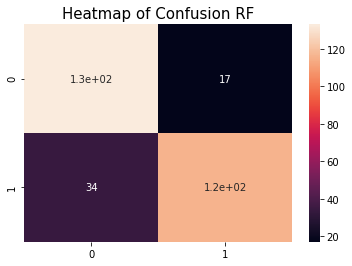

In [26]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

In [27]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True negative = ', cm[0][0])
    print('False negative = ', cm[1][0])
    print('False positive = ', cm[0][1])
    print('True positive = ', cm[1][1])

In [28]:
print_confusion_matrix(y_test, y_pred_rf)

True negative =  133
False negative =  34
False positive =  17
True positive =  116


In [29]:
fb_rf = fbeta_score(y_test, y_pred_rf, beta=1)
fb_rf

0.8197879858657243

### SVM

Support Vector Machines with a linear kernel.

In [30]:
from sklearn.svm import LinearSVC

In [31]:

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, svm.predict(X_test))))

Accuracy for C=0.01: 0.82
Accuracy for C=0.05: 0.8
Accuracy for C=0.25: 0.8133333333333334
Accuracy for C=0.5: 0.8133333333333334
Accuracy for C=1: 0.8066666666666666


we will select c = 0.01 as it has best accuracy

In [32]:
svm = LinearSVC(C=0.01)

In [33]:
svm.fit(X_train, y_train)

LinearSVC(C=0.01)

In [34]:
y_pred_sv = svm.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred_sv)

0.82

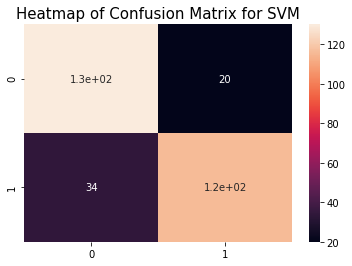

In [36]:
cm_sv = confusion_matrix(y_test, y_pred_sv)
plt.title('Heatmap of Confusion Matrix for SVM', fontsize = 15)
sns.heatmap(cm_sv, annot = True)
plt.show()

In [37]:
print_confusion_matrix(y_test, y_pred_sv)

True negative =  130
False negative =  34
False positive =  20
True positive =  116


In [38]:
fb_sv = fbeta_score(y_test, y_pred_sv, beta=1)
fb_sv

0.8111888111888111

### NaiveBayes Classifier

In [39]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


In [40]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred_nb = gnb.predict(X_test)

In [42]:
accuracy_score(y_test,y_pred_nb)

0.7066666666666667

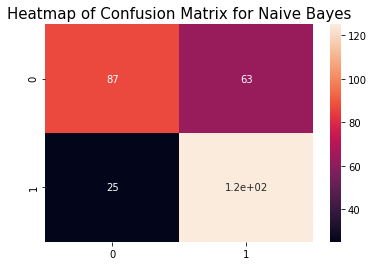

In [43]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.title('Heatmap of Confusion Matrix for Naive Bayes', fontsize = 15)
sns.heatmap(cm_nb, annot = True)
plt.show()

In [44]:
print_confusion_matrix(y_test, y_pred_nb)

True negative =  87
False negative =  25
False positive =  63
True positive =  125


In [45]:
fb_nb = fbeta_score(y_test, y_pred_nb, beta=1)
fb_nb

0.7396449704142012

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))
    

    
# final_wc = LogisticRegression(C=0.05)
# final_wc.fit(X, target)
# print ("Final Accuracy: %s" 
#        % accuracy_score(target, final_wc.predict(X_test)))



Accuracy for C=0.01: 0.8266666666666667
Accuracy for C=0.05: 0.8166666666666667
Accuracy for C=0.25: 0.8
Accuracy for C=0.5: 0.8033333333333333
Accuracy for C=1: 0.8133333333333334


we will select c = 0.01 as it has best accuracy

In [48]:
lr = LogisticRegression(C=0.01)

In [49]:
lr.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [50]:
y_pred_lr = lr.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred_lr)

0.8266666666666667

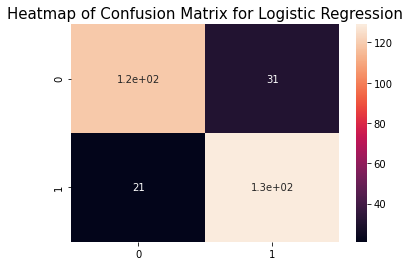

In [52]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.title('Heatmap of Confusion Matrix for Logistic Regression', fontsize = 15)
sns.heatmap(cm_lr, annot = True)
plt.show()

In [53]:
print_confusion_matrix(y_test, y_pred_lr)

True negative =  119
False negative =  21
False positive =  31
True positive =  129


In [54]:
fb_lr = fbeta_score(y_test, y_pred_lr, beta=1)
fb_lr

0.8322580645161289

## Final Result

In [55]:
list = [fb_lr,fb_rf,fb_sv,fb_nb]


if (fb_sv == max(list)):
    print('The best F1 score is {:.7f} for SupportVector Machine model.'.format(fb_sv))
elif (fb_lr == max(list)):
    print('The best F1 score is {:.7f} for Logistic Regression model.'.format(fb_lr))
elif (fb_nb == max(list)):
    print('The best F1 score is {:.7f} for NaiveBayes model.'.format(fb_nb))
else: 
    print('The best F1 score is {:.7f} for Random Forest model.'.format(fb_rf))

The best F1 score is 0.8322581 for Logistic Regression model.
